<a href="https://colab.research.google.com/github/rkgupta7463/Computer-Visions-Projects/blob/main/Road_Mark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Dec  4 10:04:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **1. Installing requirs libraries and Creating the YOLOV8 Model**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

### 2. **Colecting the datas from Kaggle with Kaggle API (Road Mark Detection)**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d pkdarabi/road-mark-detection

100% 161M/161M [00:11<00:00, 20.9MB/s]
100% 161M/161M [00:11<00:00, 14.7MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/road-mark-detection.zip",'r')
zip.extractall("/content/road-mark-detection")
zip.close()

### **3. Now Let's start training our YOLOv8n Model with Our custom data**

In [ ]:
model.train(data="road-mark-detection/data.yaml", epochs=25)  # train the model

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=road-mark-detection/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

### **4. Now Let's Our YOLOv8n Model**

In [ ]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/road-mark-detection/valid/labels.cache... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.62it/s]
                   all        417       1966      0.767      0.776        0.8      0.597
              BUS LANE        417         32      0.878          1      0.944      0.688
      Jeltaya razmetka        417         29      0.962       0.87      0.901       0.69
              Liniya 1        417       1212      0.825      0.621      0.756      0.548
              Liniya 2        417         59      0.575       0.22      0.328      0.156
               Perehod        417        132      0.817      0.916      0.924      0.634
                 

### **4. Now Let's look once confusion metrics and other metrics as well**

In [ ]:
from PIL import Image

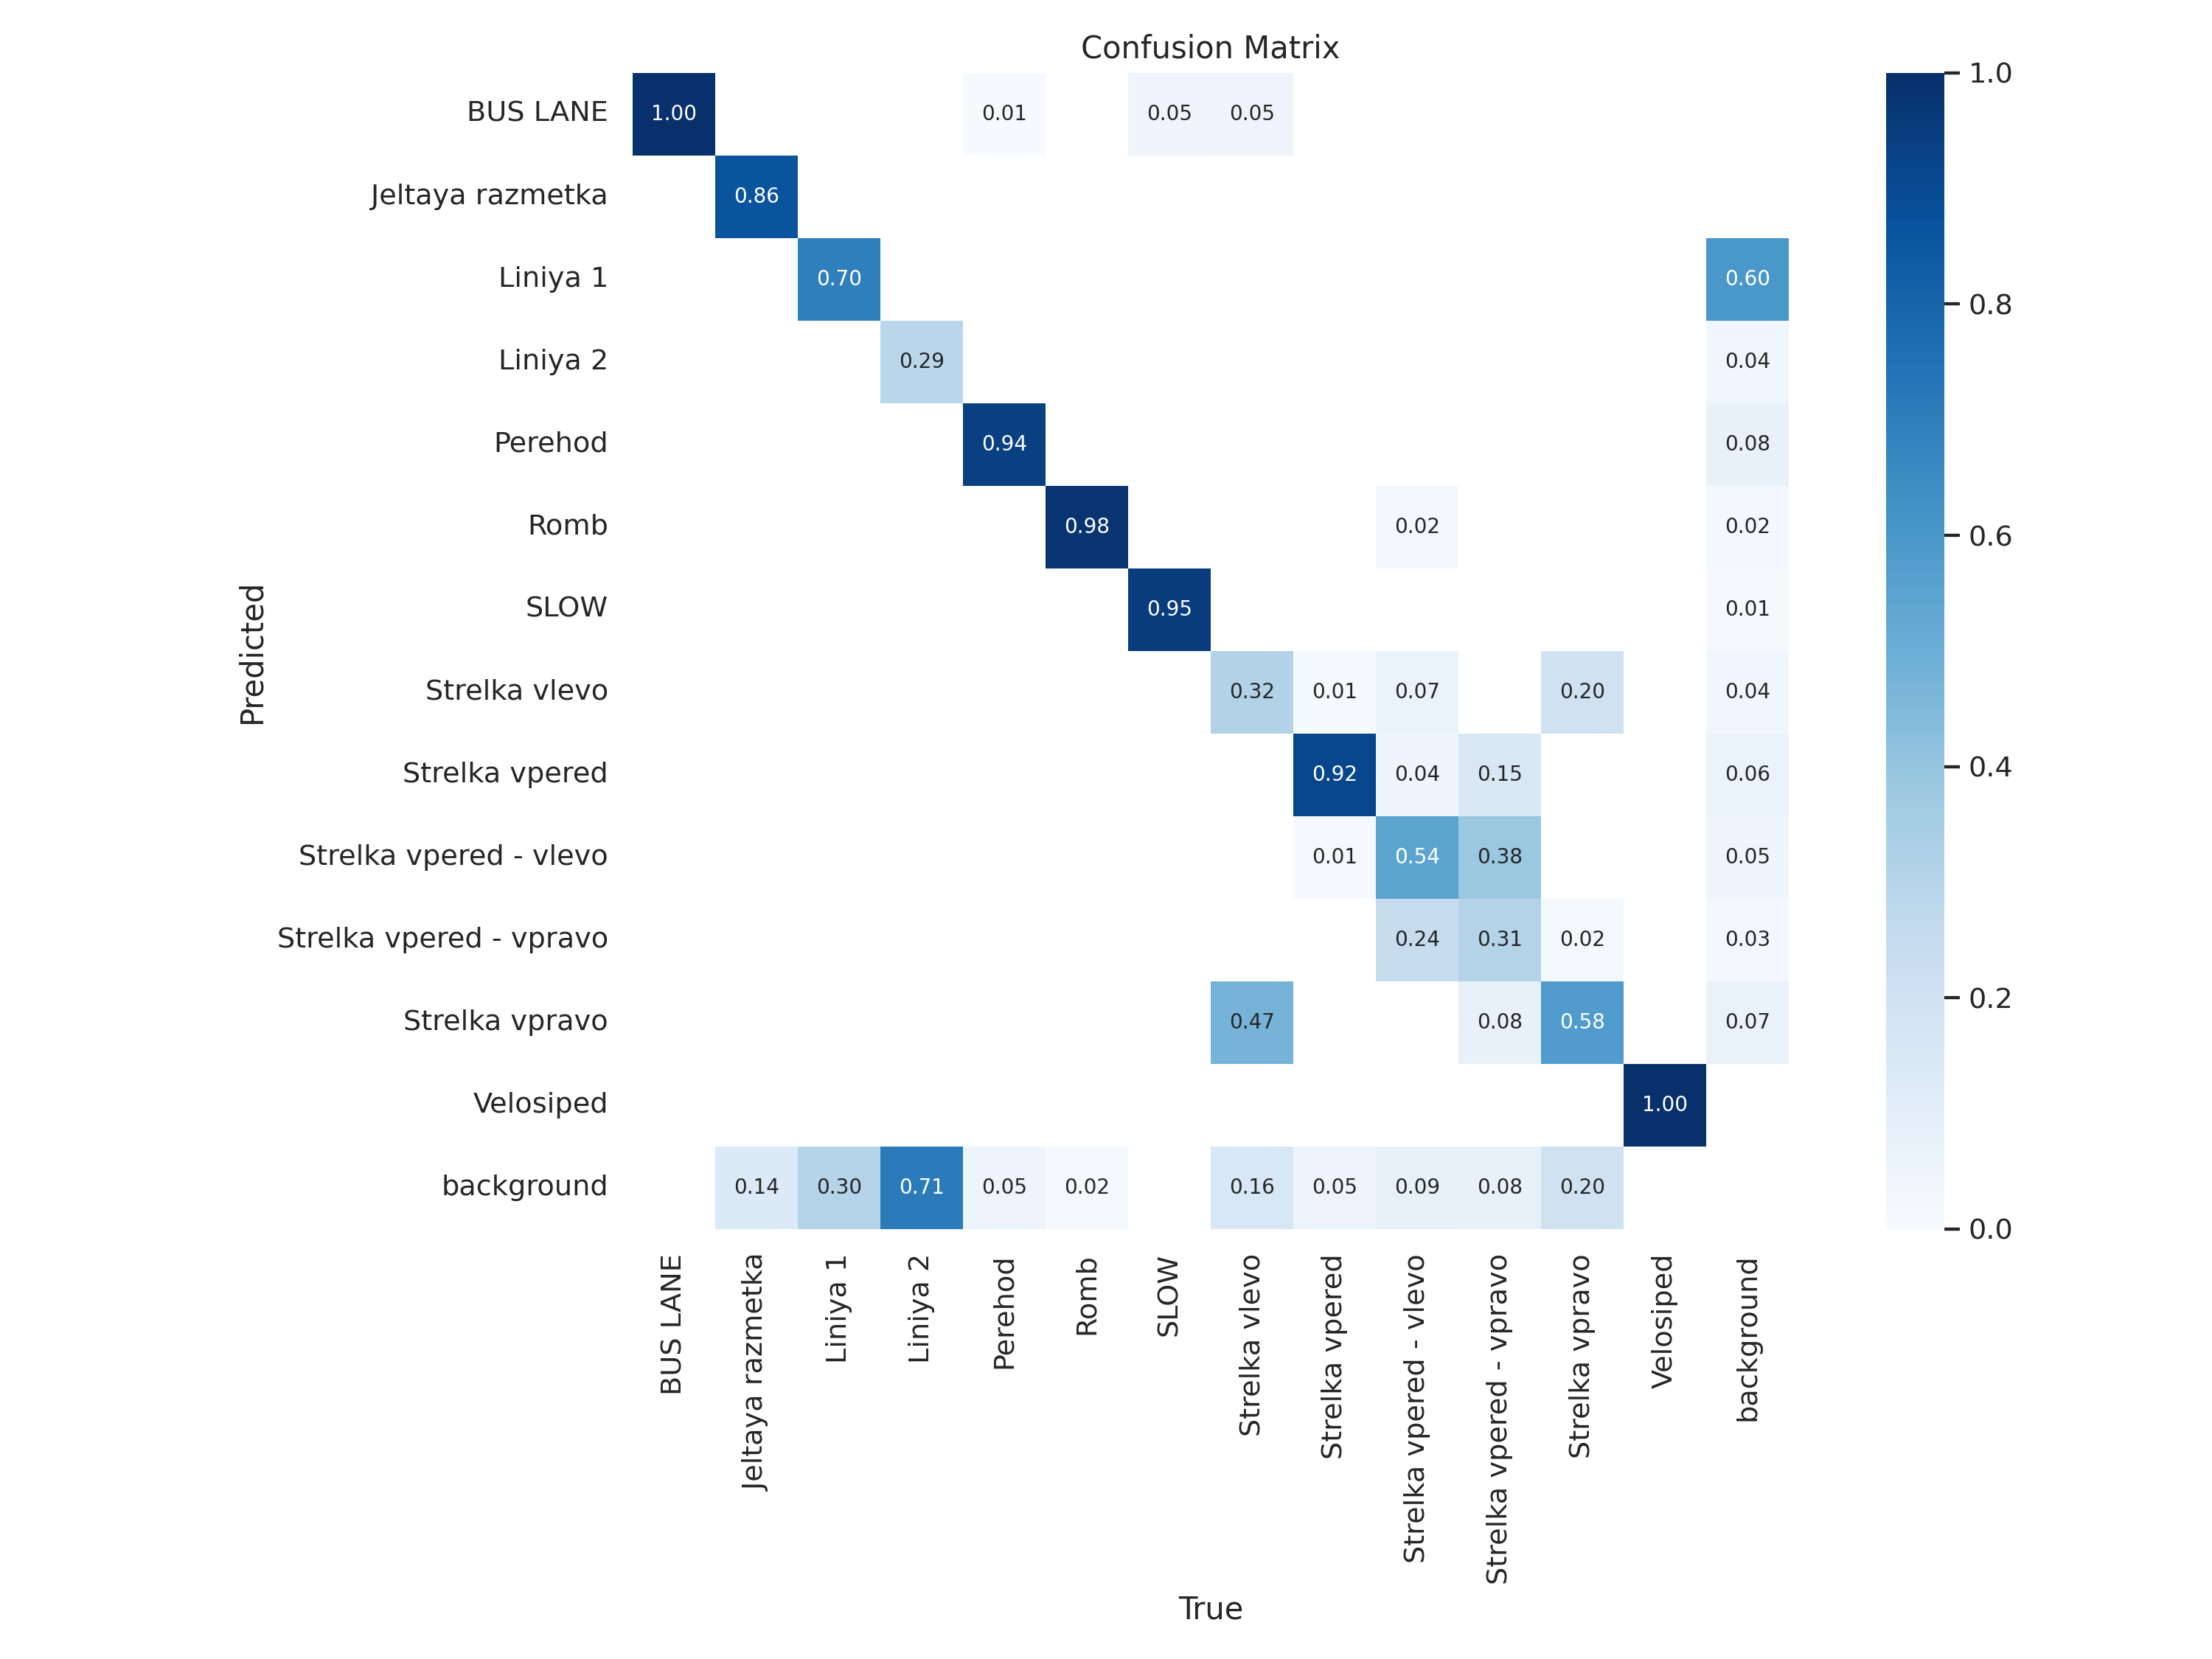

In [32]:
Image.open("/content/runs/detect/train/confusion_matrix.png")

### **5. Now Let's Predict with unseen images or data and looking how it accurate**

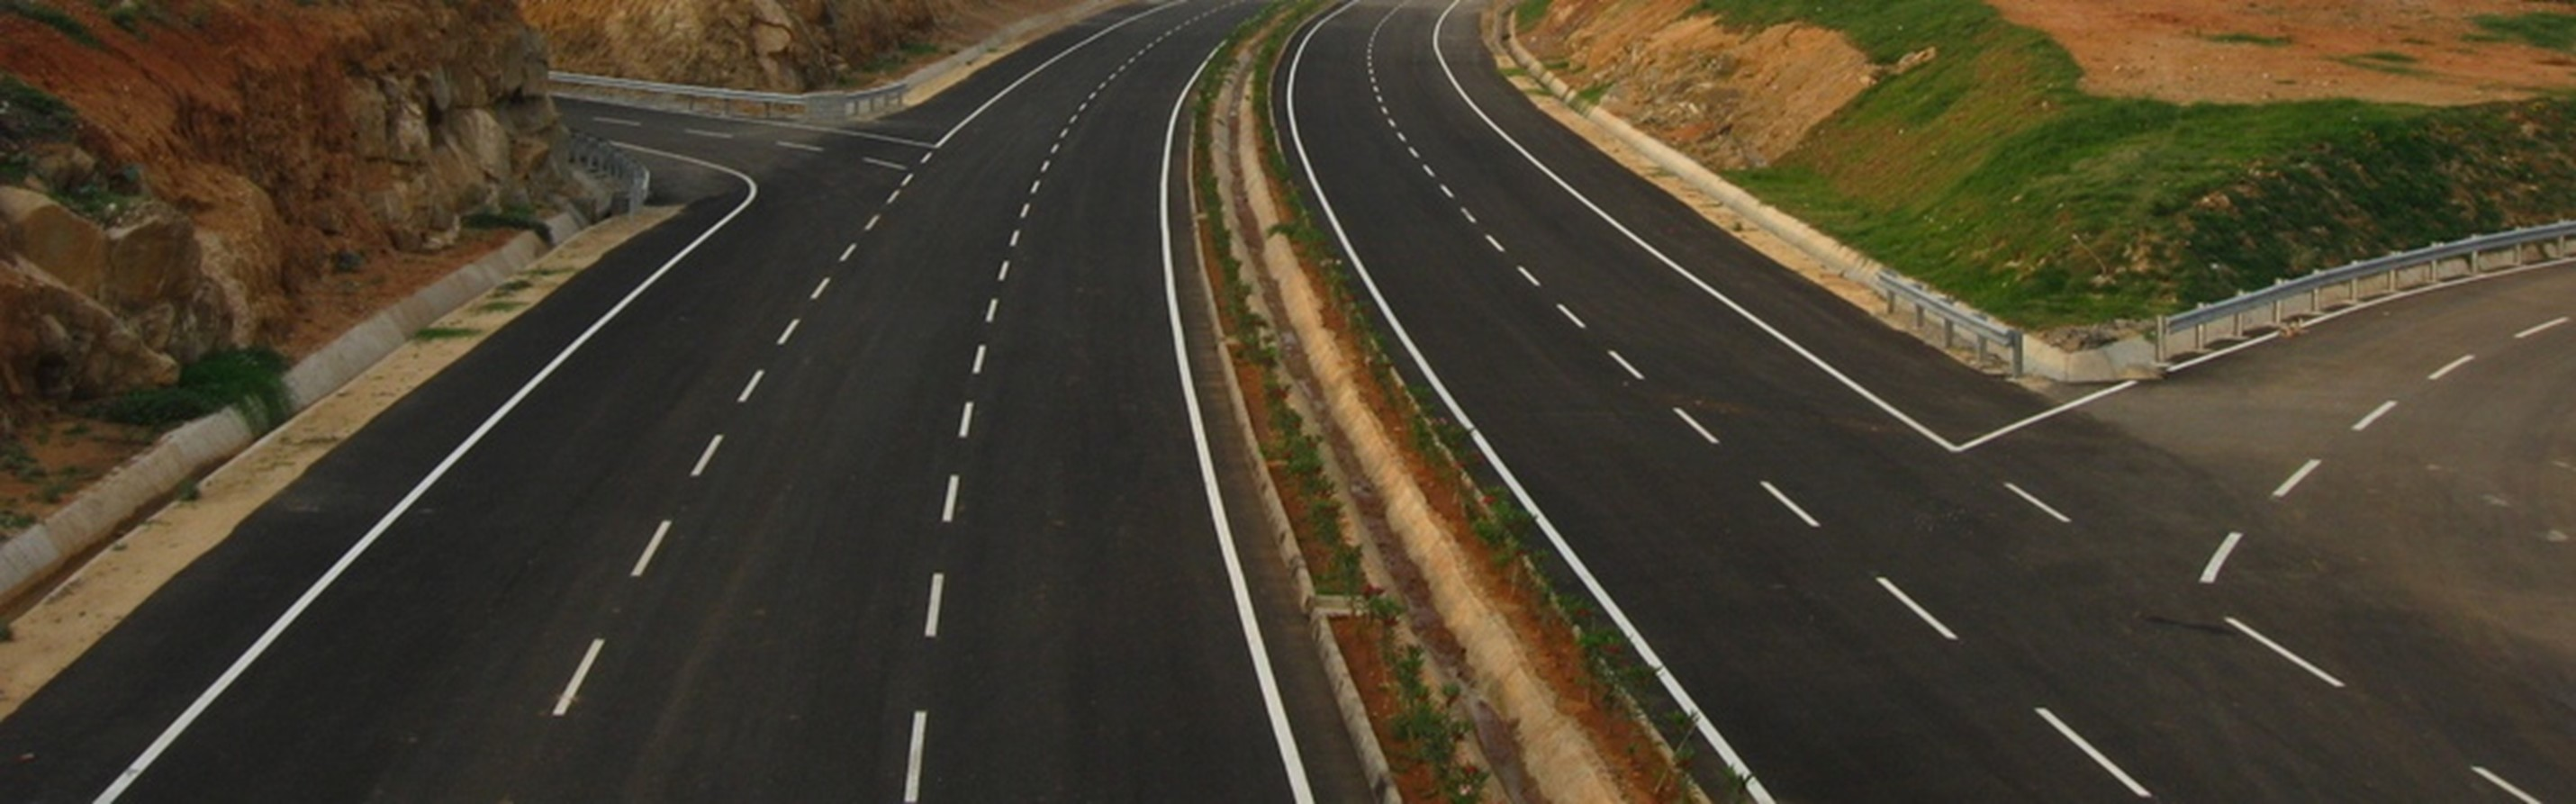

In [ ]:
Image.open("Road-Marking-Machine.jpg")

In [27]:
# from PIL
model = YOLO("/content/runs/detect/train/weights/best.pt")
im1 = Image.open("Road-Marking-Machine.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict3


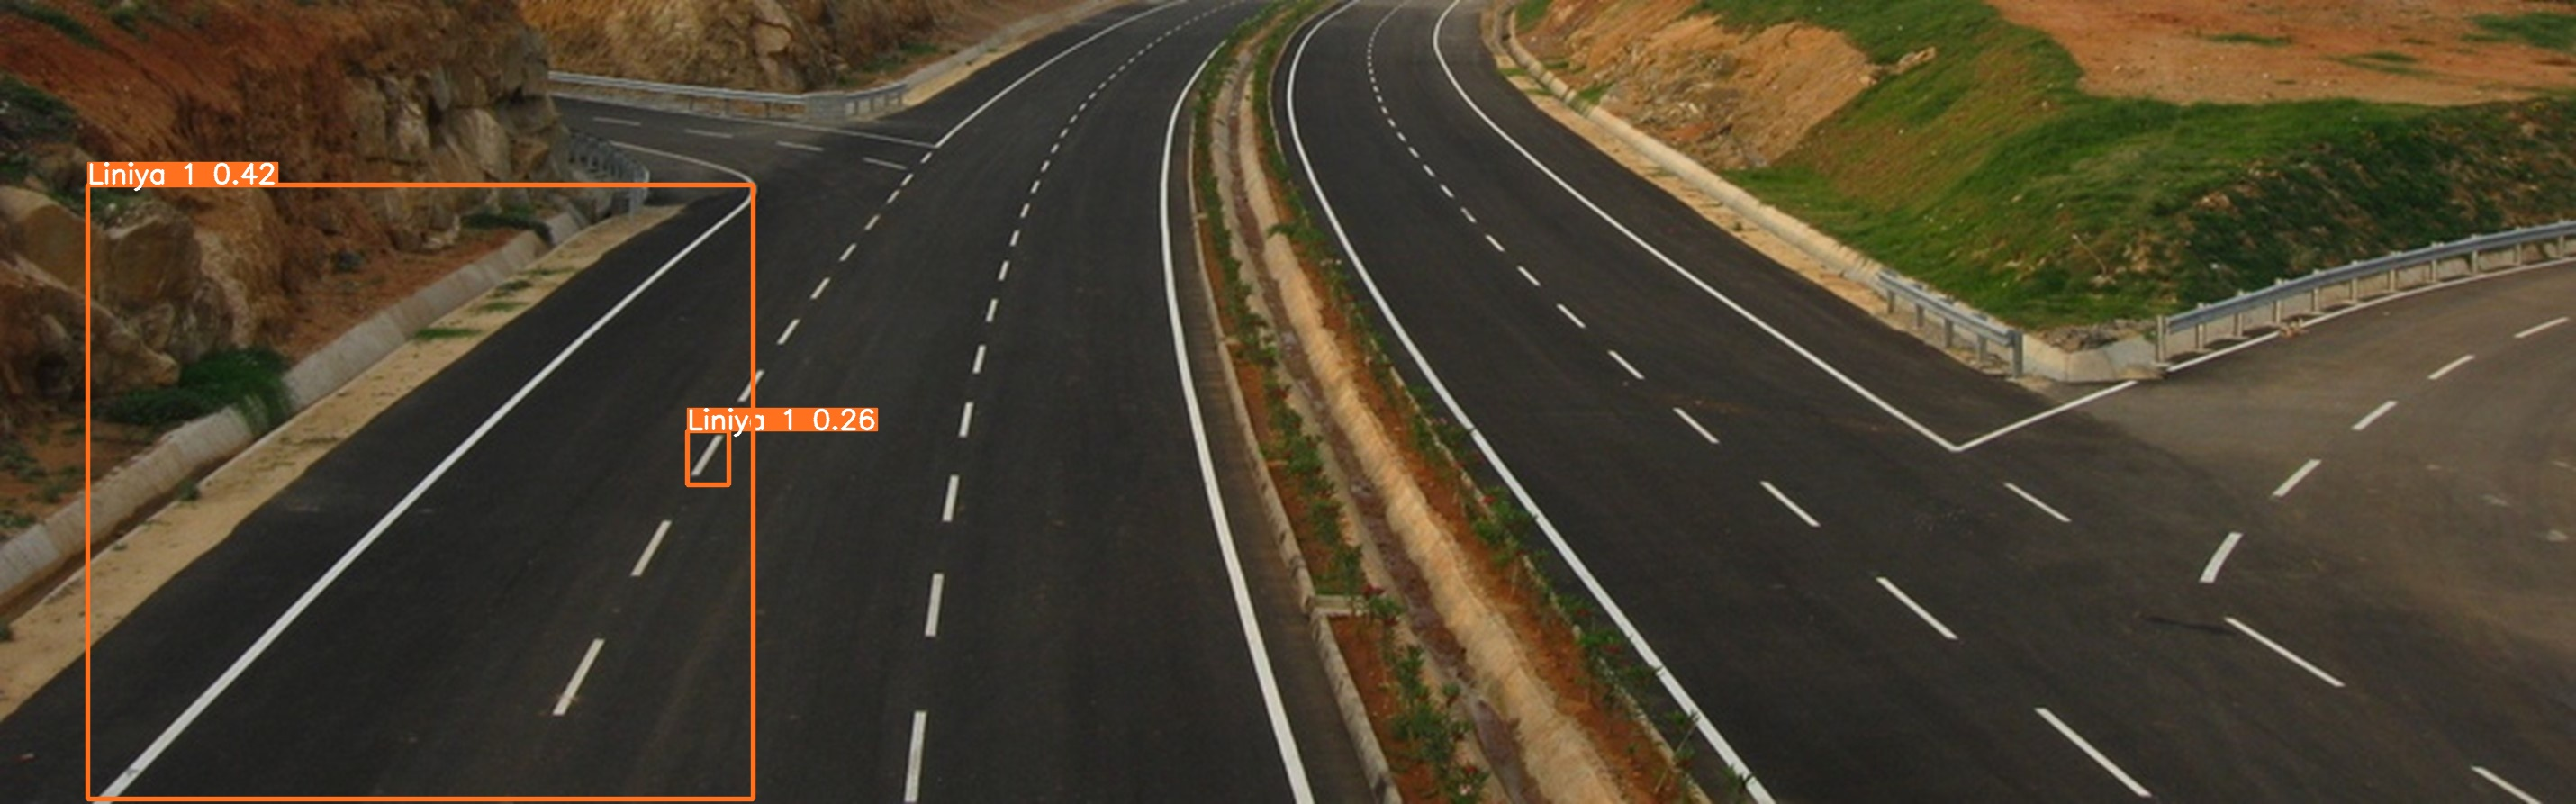

In [28]:
Image.open("/content/runs/detect/predict3/image0.jpg")

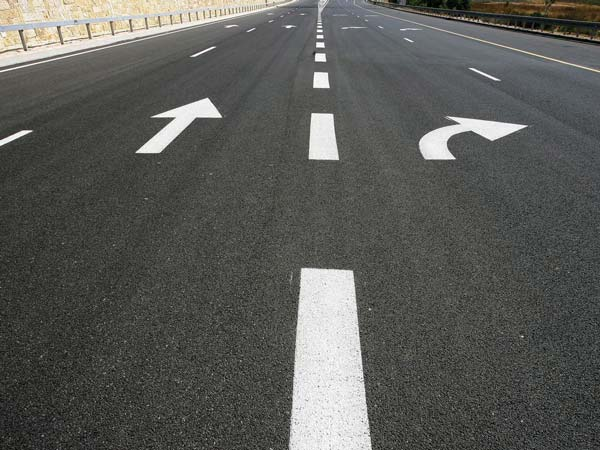

In [29]:
Image.open("/content/03-1470225251-lane-indicator-road-markings.jpg")

In [30]:
# from PIL
model = YOLO("/content/runs/detect/train/weights/best.pt")
im1 = Image.open("/content/03-1470225251-lane-indicator-road-markings.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict4


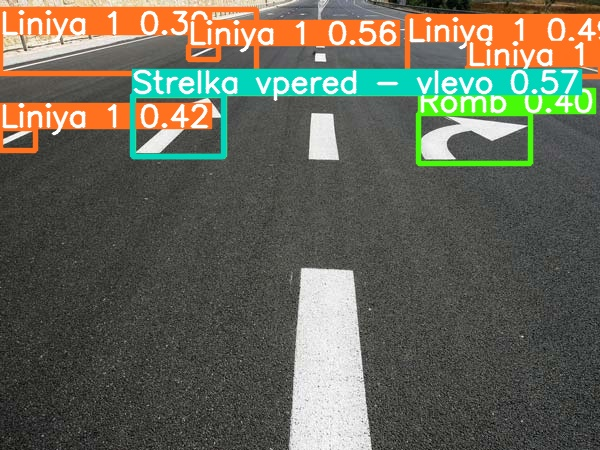

In [31]:
Image.open("/content/runs/detect/predict4/image0.jpg")

### **6. Now Let's Predict with unseen video**

In [33]:
import cv2 as cv

In [38]:
def visualize_results(frame, boxes, probs, masks=None):
    # Your visualization logic here
    # This is a basic example, you should modify it based on your needs
    for box, prob in zip(boxes, probs):
        x, y, w, h = box
        color = (0, 255, 0)  # Green color for the bounding box
        label = f"Class {prob.argmax()}: {prob.max():.2f}"  # Example label
        cv.rectangle(frame, (int(x), int(y)), (int(x+w), int(y+h)), color, 2)
        cv.putText(frame, label, (int(x), int(y)-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return frame

In [41]:
import cv2 as cv

def visualize_results(frame, boxes, probs, masks=None):
    # Your visualization logic here
    # This is a basic example, you should modify it based on your needs
    for box, prob in zip(boxes, probs):
        x, y, w, h = box
        color = (0, 255, 0)  # Green color for the bounding box
        label = f"Class {prob.argmax()}: {prob.max():.2f}"  # Example label
        cv.rectangle(frame, (int(x), int(y)), (int(x+w), int(y+h)), color, 2)
        cv.putText(frame, label, (int(x), int(y)-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return frame

# Open the video file
video_path = "/content/What do these road markings mean Let’s find out!.mp4"
cap = cv.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results_list = model(frame)

        for results in results_list:
            # Access bounding boxes, class probabilities, and masks (if available) for each result
            boxes = results.boxes  # Check the actual attribute name in the Results object
            probs = results.probs  # Check the actual attribute name in the Results object
            masks = results.masks  # Check the actual attribute name in the Results object

            # Visualize the results on the frame
            annotated_frame = visualize_results(frame, boxes, probs, masks)

            # Display the annotated frame
            cv.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv.destroyAllWindows()

TypeError: ignored